In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing dataset train
df =pd.read_csv('/Users/jitikagupta/Downloads/Black Friday /train.csv') 

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [5]:
#import test data
df_test=pd.read_csv('/Users/jitikagupta/Downloads/Black Friday /test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
#merge test n train data
final_df=pd.concat([df,df_test],axis=0)
final_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
final_df.drop(['User_ID'],axis=1,inplace=True)

In [9]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [10]:
#final_df['Gender']=final_df['Gender'].map({'F':0,'M':1})
final_df.head(20)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


In [11]:
#handling categorical data
final_df['Age'].unique().tolist()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

In [12]:
#1st method actually encoded 
#final_df['Age']=final_df['Age'].map({'0-17':1,'55+':7,'26-35':3,'46-50':5,'51-55':6,'36-45':4,'18-25':2})

In [13]:
#2nd method for encoding(donot excutes this)
from sklearn.preprocessing import LabelEncoder

# Initialize and fit LabelEncoder
le = LabelEncoder()
final_df['Age'] = le.fit_transform(final_df['Age'])
final_df['Gender'] = le.fit_transform(final_df['Gender'])
print(final_df)
print("Category Mapping:", le.classes_)

       Product_ID  Gender  Age  Occupation City_Category  \
0       P00069042       0    0          10             A   
1       P00248942       0    0          10             A   
2       P00087842       0    0          10             A   
3       P00085442       0    0          10             A   
4       P00285442       1    6          16             C   
...           ...     ...  ...         ...           ...   
233594  P00118942       0    2          15             B   
233595  P00254642       0    2          15             B   
233596  P00031842       0    2          15             B   
233597  P00124742       0    4           1             C   
233598  P00316642       0    4           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0           

In [14]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
#fixing categorical city_category
df_city=pd.get_dummies(final_df['City_Category'],drop_first=True,dtype=int)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [16]:
final_df=pd.concat([final_df,df_city],axis=1)
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [17]:
#drop city category and inplace used to make it permanent
final_df.drop('City_Category',axis=1,inplace=True)

In [18]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [19]:
#missing null data
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
final_df['Product_Category_1'].unique()


array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [21]:
final_df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
final_df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [23]:
final_df['Product_Category_1'].value_counts()

Product_Category_1
5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: count, dtype: int64

In [24]:
#replace missing avlue with mode
final_df['Product_Category_2']=final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0])

In [25]:
final_df['Product_Category_2'].mode()
#0 to be added to make the value 8.0

0    8.0
Name: Product_Category_2, dtype: float64

In [26]:
final_df['Product_Category_2'].isnull().sum()

np.int64(0)

In [27]:
#replace missing avlue with mode
final_df['Product_Category_3']=final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0])

In [28]:
#replace missing avlue with mode
final_df['Product_Category_3'].mode()[0]

np.float64(16.0)

In [29]:
final_df['Product_Category_3'].isnull().sum()

np.int64(0)

In [30]:
final_df['Stay_In_Current_City_Years'].unique().tolist()

['2', '4+', '3', '1', '0']

In [31]:
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].str.replace('+','')

In [32]:
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].astype(int)

In [33]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


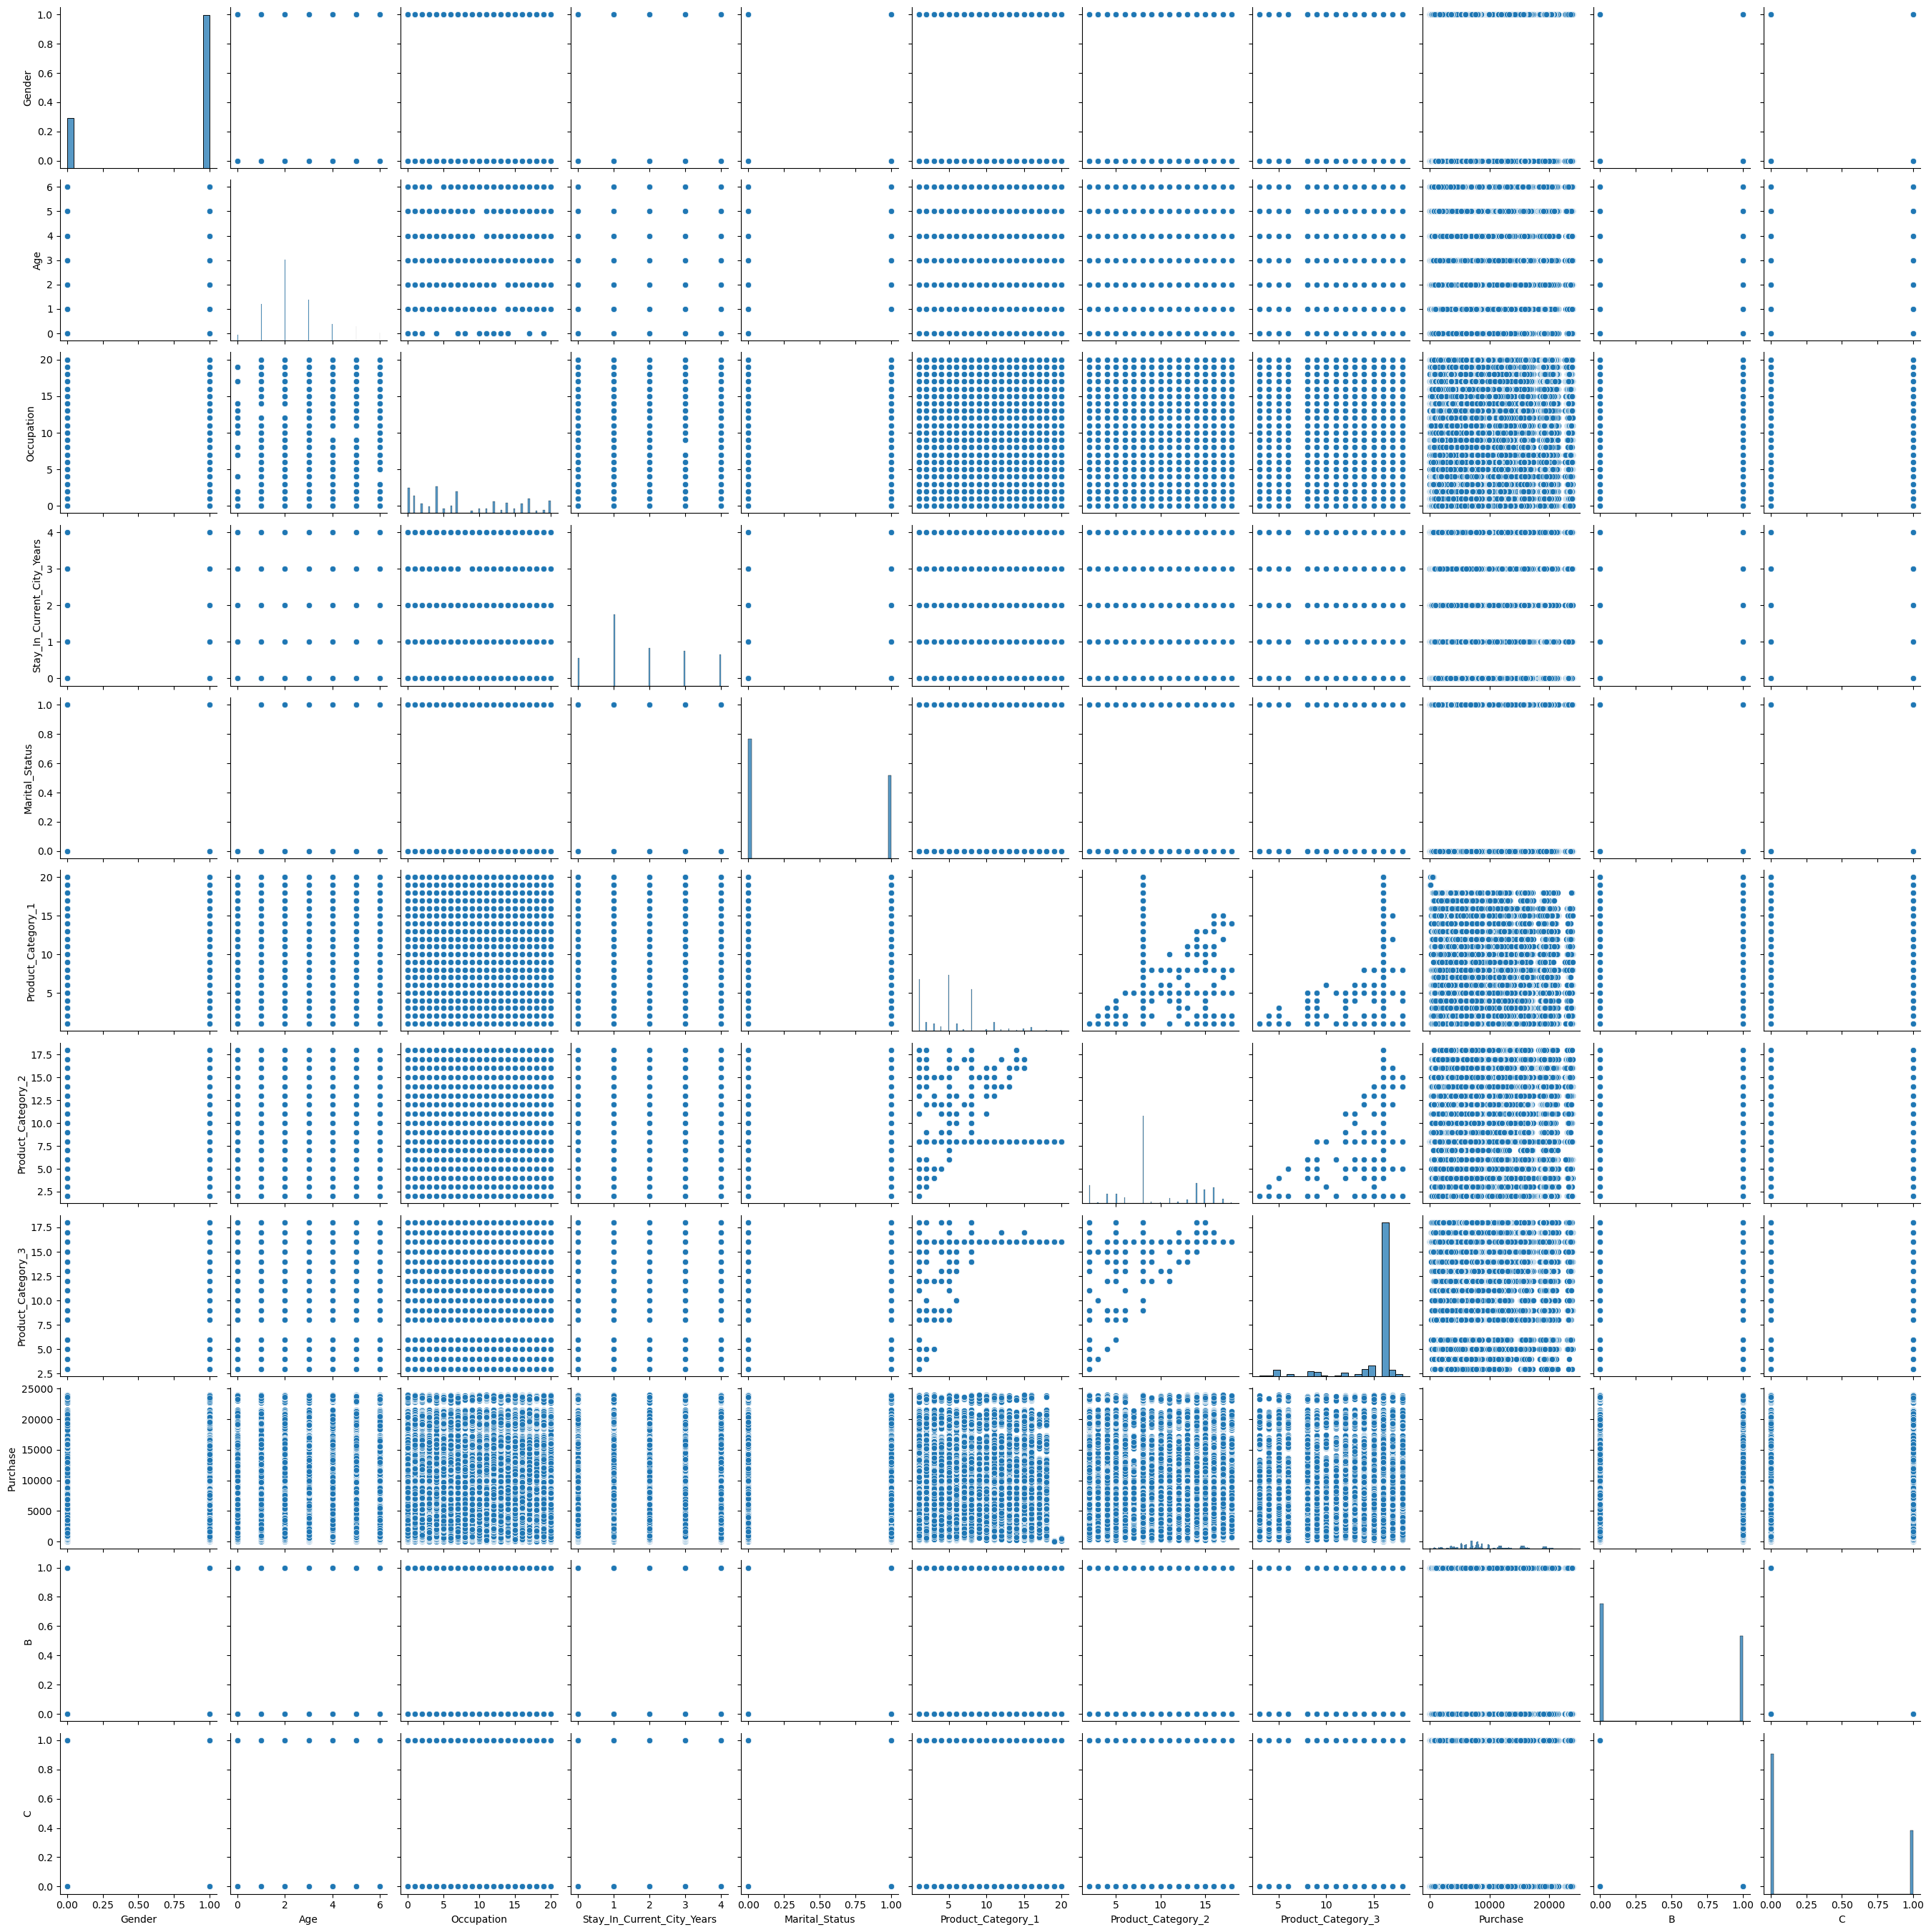

In [34]:
#visualisation
sns.pairplot(final_df,diag_kind='hist')

[Text(0, 0, '9275.87'),
 Text(0, 0, '9408.78'),
 Text(0, 0, '9387.65'),
 Text(0, 0, '9403.7'),
 Text(0, 0, '9326.44'),
 Text(0, 0, '9593.77'),
 Text(0, 0, '9399.43')]

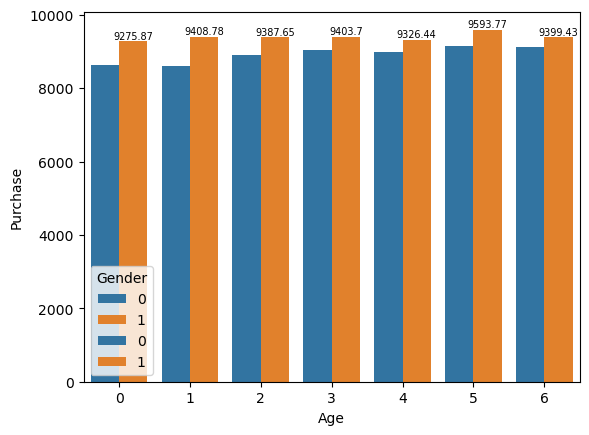

In [35]:
sns.barplot(final_df,x='Age',y='Purchase',hue='Gender',errorbar=None).bar_label(sns.barplot(final_df,x='Age',y='Purchase',hue='Gender',errorbar=None).containers[1],fontsize=7)


[Text(0, 0, '8642.84'),
 Text(0, 0, '8607.29'),
 Text(0, 0, '8917.49'),
 Text(0, 0, '9051.77'),
 Text(0, 0, '8982.7'),
 Text(0, 0, '9160.45'),
 Text(0, 0, '9110.58')]

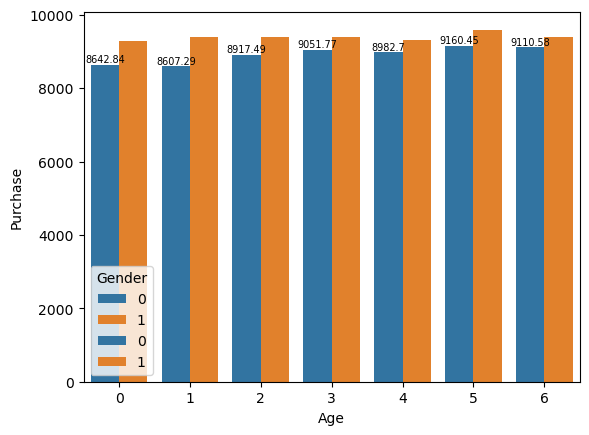

In [36]:
sns.barplot(final_df,x='Age',y='Purchase',hue='Gender',errorbar=None).bar_label(sns.barplot(final_df,x='Age',y='Purchase',hue='Gender',errorbar=None).containers[0],fontsize=7)


<Axes: xlabel='Occupation', ylabel='Purchase'>

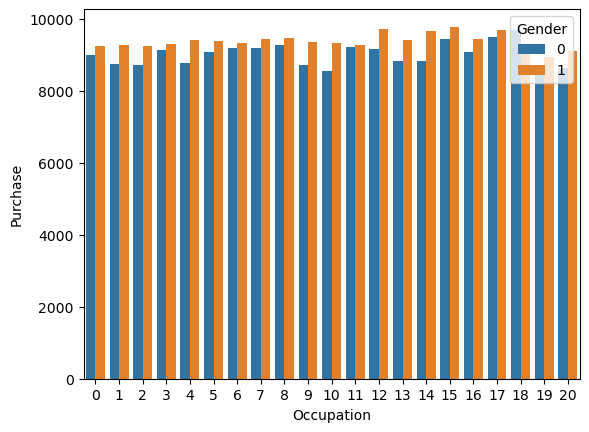

In [37]:
sns.barplot(final_df,x='Occupation',y='Purchase',hue='Gender',errorbar=None)


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

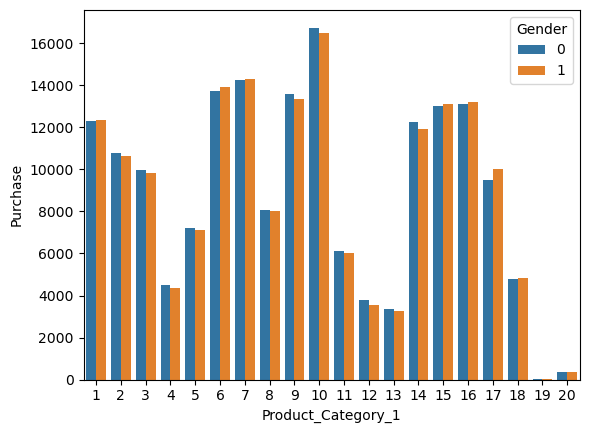

In [38]:
sns.barplot(final_df,x='Product_Category_1',y='Purchase',hue='Gender',errorbar=None)


<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

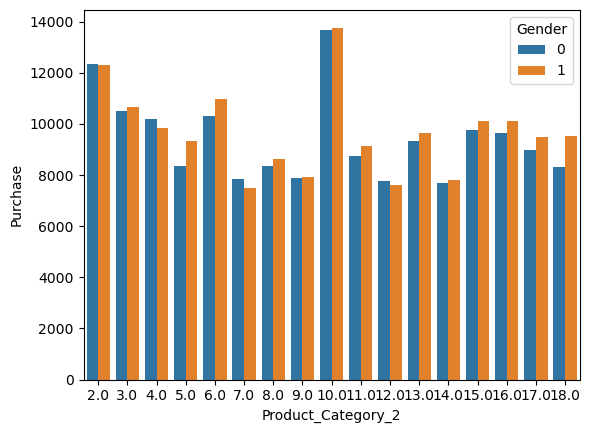

In [39]:
sns.barplot(final_df,x='Product_Category_2',y='Purchase',hue='Gender',errorbar=None)


<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

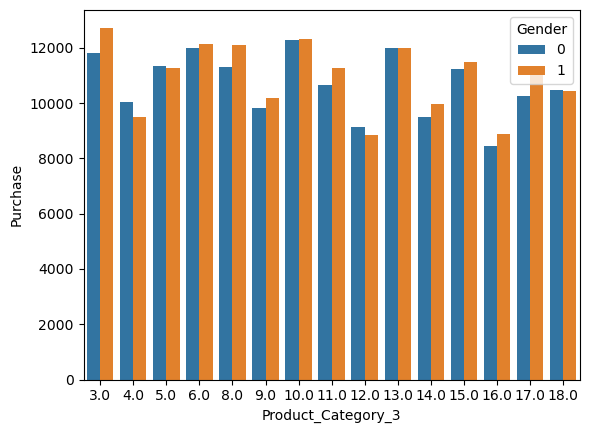

In [40]:
sns.barplot(final_df,x='Product_Category_3',y='Purchase',hue='Gender',errorbar=None)


product_category_1 > 2> 3

In [41]:
#feature scaling
df_test=final_df[final_df['Purchase'].isnull()]
df_train=final_df[final_df['Purchase'].notnull()]
#df_train=final_df[~final_df['Purchase'].isnull()]

In [42]:
from sklearn.model_selection import train_test_split
X=df_train.drop('Purchase',axis=1)
y=df_train['Purchase']

In [43]:
X_train, X_test,y_train, y_test = train_test_split(X,y,
                                   random_state=42, 
                                   test_size=0.33)

In [44]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<Axes: xlabel='Product_Category_2'>

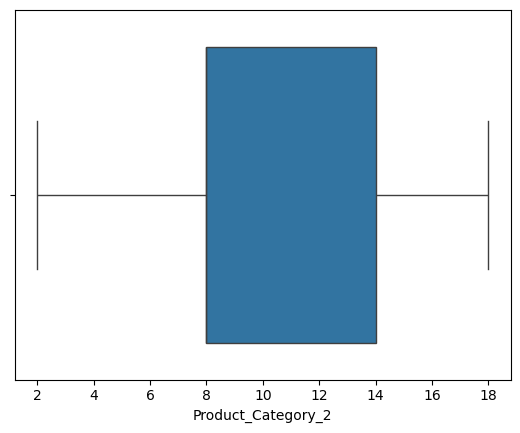

In [46]:
sns.boxplot(final_df,x='Product_Category_2')

<Axes: xlabel='Product_Category_3'>

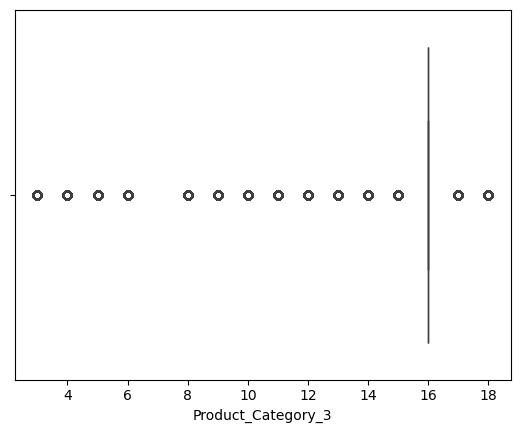

In [47]:
sns.boxplot(df_train,x='Product_Category_3')

<Axes: xlabel='Product_Category_1'>

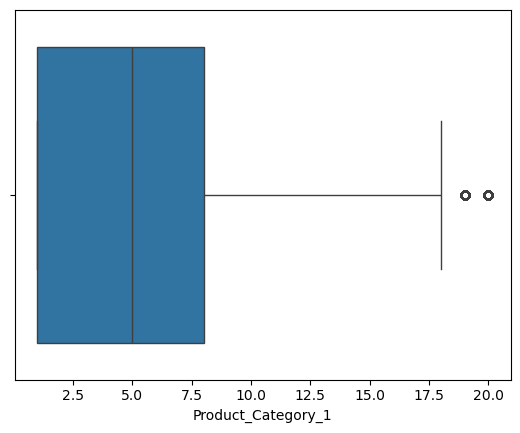

In [48]:
sns.boxplot(final_df,x='Product_Category_1')

In [ ]:
sns.heatmap(X_train,annot=True,fmt='.1f')

In [ ]:
plt.pie(df_train['Purchase'].value_counts())